In [1]:
! pip install gluoncv
! pip install mxnet

In [2]:
!git clone "https://github.com/Ravikiran-Bhonagiri/aws-machine-learning-university-accelerated-cv.git"

fatal: destination path 'aws-machine-learning-university-accelerated-cv' already exists and is not an empty directory.


In [3]:
%matplotlib inline
from gluoncv import model_zoo
from gluoncv.data.transforms.presets import imagenet, yolo
from gluoncv.utils.viz import image, plot_bbox
from matplotlib import pyplot as plt
from mxnet.image import imread
import gluoncv

In [4]:
net = model_zoo.get_model('yolo3_darknet53_voc', pretrained=True)

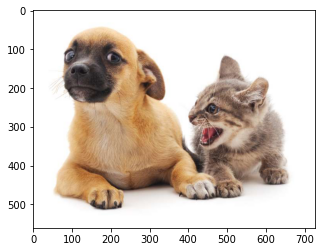

In [5]:
test_image = '/content/aws-machine-learning-university-accelerated-cv/data/catdog.png'
im_fname = imread(test_image)
image.plot_image(im_fname)

In [6]:
x, img = yolo.load_test(test_image)
print('Shape of pre-processed image:', x.shape)

Shape of pre-processed image: (1, 3, 416, 540)


In [7]:
class_IDs, scores, bounding_boxs = net(x)

for c, s in zip(class_IDs.reshape(-1,), scores.reshape(-1,)):
    if s.asscalar() < 0.8:
        break
    print ("Class ID : {}".format(c.asscalar()), " --> score : {}".format(s.asscalar()))

Class ID : 11.0  --> score : 0.9946417808532715
Class ID : 7.0  --> score : 0.9910183548927307


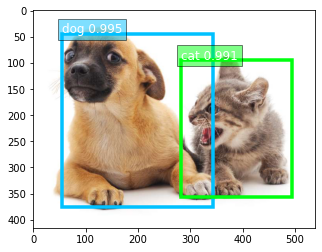

In [8]:
ax = plot_bbox(img, bounding_boxs[0], scores[0],
               class_IDs[0], class_names=net.classes)
plt.show()

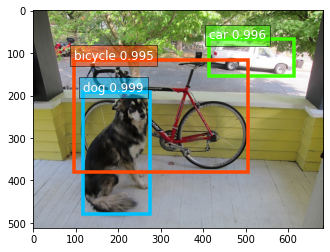

In [9]:
dog_bike = '/content/aws-machine-learning-university-accelerated-cv/data/bikedog.jpg'

dog_bike_raw, dog_bike_img = yolo.load_test(dog_bike, short=512)
dog_bike_class_IDs, dog_bike_scores, dog_bike_bounding_boxs = net(dog_bike_raw)
ax = plot_bbox(dog_bike_img, dog_bike_bounding_boxs[0], dog_bike_scores[0],
                         dog_bike_class_IDs[0], class_names=net.classes)
plt.show()